# ATM S 451 Final Project Code 

## Author: Alex Hewett (ahewett@uw.edu)

### Loads data from Davis Vantage Pro II weather stations (mostly txt files) to use, download the "report" directory to the same directory as this notebook and the notebook should run smoothly!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from urllib import request

In [2]:
def load_davis_data(dat_file, txt=False):
    '''
    @ Alex Hewett: ahewett@uw.edu
    For use in ATM S 451 to load txt file output from Davis Vantage Pro II 
    
    dat_file = path to txt or csv file being loaded
    txt (flag) = txt or csv file. If true, use the tab delimiter to parse the davis data properly
    '''
    if txt:       
        df = pd.read_csv(dat_file, skiprows=1, delimiter='\t')
    else:
        df = pd.read_csv(dat_file, skiprows=1)
    # redefine nan vals and drop columns containing too many
    df = df.replace({'---': np.nan}, regex=True).dropna(axis=1, thresh=100)
    # Change col names to match Davis output
    rename_dict = {'Out': 'Temp Out', 'Temp': 'Hi Temp', 'Temp.1': 'Low Temp',
               'Hum': 'Out Hum', 'Pt.': 'Dew Pt.', 'Speed': 'Wind Speed', 'Dir': 'Wind Dir',
               'Run': 'Wind Run', 'Speed.1': 'Hi Speed', 'Dir.1': 'Hi Dir',
               'Chill': 'Wind Chill', 'Index': 'Heat Index', 'Index.1': 'THW Index',
               'Rate': 'Rain Rate', 'D-D': 'Heat D-D', 'D-D .1': 'Cool D-D',
               'Temp.2': 'In Temp', 'Hum.1': 'In Hum', 'Dew': 'In Dew', 'Heat': 'In Heat',
               'EMC': 'In EMC', 'Density': 'In Air Density', 'Samp': 'Wind Samp',
               'Tx': 'Wind Tx', 'Recept': 'ISS Recept', 'Int.': 'Arc. Int.'}
    df = df.rename(columns=rename_dict)
    return df

# Time periods

week 1: 1/12 - 1/19 * most groups don't really have data prior to 1/19<br>
week 2: 1/19 - 1/26<br>
week 3: 1/26 - 2/2<br>
week 4: 2/2 - 2/9<br>
week 5: 2/9 - 2/16<br>

### NOTE: group 3 week 4 does not load with load_davis_data properly (missing data replacement issue). Group 3 week 2 is loaded as csv.

# Load each groups data and then concatenate

# Groups 1 & 2

In [3]:
group1 = pd.concat([load_davis_data(f'report/group_1/g1w{i}.txt', txt=True) for i in [2,3,4,5,6]], ignore_index=True)
group1.head()
len(group1)
cols1 = group1.columns

In [4]:
group2 = pd.concat([load_davis_data(f'report/group_2/g2w{i}.txt', txt=True) for i in [1,2,3,4,5,6]], ignore_index=True)
group2.head(), group2.tail()
len(group2)
cols2 = group2.columns

In [5]:
cols1 == cols2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

#  Group 3 

In [6]:
d1 = load_davis_data('report/group_3/g3w2.csv')

In [7]:
d2 = pd.read_csv("report/group_3/g3w3.txt", skiprows=1)
# df5 = df5.replace({'---': np.nan}, regex=True).dropna(axis=1, thresh=100)
    # Change col names to match Davis output
rename_dict = {'Out': 'Temp Out', 'Temp': 'Hi Temp', 'Temp.1': 'Low Temp',
               'Hum': 'Out Hum', 'Pt.': 'Dew Pt.', 'Speed': 'Wind Speed', 'Dir': 'Wind Dir',
               'Run': 'Wind Run', 'Speed.1': 'Hi Speed', 'Dir.1': 'Hi Dir',
               'Chill': 'Wind Chill', 'Index': 'Heat Index', 'Index.1': 'THW Index',
               'Rate': 'Rain Rate', 'D-D': 'Heat D-D', 'D-D .1': 'Cool D-D',
               'Temp.2': 'In Temp', 'Hum.1': 'In Hum', 'Dew': 'In Dew', 'Heat': 'In Heat',
               'EMC': 'In EMC', 'Density': 'In Air Density', 'Samp': 'Wind Samp',
               'Tx': 'Wind Tx', 'Recept': 'ISS Recept', 'Int.': 'Arc. Int.'}
d2 = d2.rename(columns=rename_dict)

# Drop weird columns
d3col = d2.columns
col = d1.columns
drop_col = []
for i in d3col:
    if i not in col:
        drop_col.append(i)
d2 = d2.drop(drop_col, axis=1)

In [8]:
d3 = load_davis_data('report/group_3/g3w4.txt', txt=True)

In [9]:
d4 = load_davis_data('report/group_3/g3w5.txt', txt=True)

In [10]:
d5 = load_davis_data('report/group_3/g3w6.txt', txt=True)

In [11]:
group3 = pd.concat([d1, d2, d3, d4, d5], ignore_index=True)
len(group3)
cols3 = group3.columns

In [12]:
cols3 == cols1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

#  load groups 4, 5

In [13]:
d41 = load_davis_data('report/group_4/g4w1-w4.txt', txt=True)
d41.head()
d41 = d41.drop(['ET '], axis=1)
d41

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Tx,ISS Recept,Arc. Int.
0,01/11/22,11:10 a,21.3,21.4,21.3,45,8.9,0.0,NNW,0.00,...,22.7,46,10.5,22.2,8.59,1.2314,101,6,50.0,10
1,01/11/22,11:20 a,20.8,21.5,18.6,48,9.4,0.9,NE,0.54,...,23.4,44,10.4,22.9,8.27,1.2244,191,6,94.6,10
2,01/11/22,11:30 a,15.8,18.4,13.7,66,9.4,1.3,SSE,0.80,...,21.5,43,8.4,20.3,8.22,1.2344,205,6,100.0,10
3,01/11/22,11:40 a,12.8,13.6,12.2,72,7.9,1.3,SSE,0.80,...,19.0,43,6.1,17.8,8.25,1.2467,205,6,100.0,10
4,01/11/22,11:50 a,11.8,12.2,11.7,75,7.5,1.3,SE,0.80,...,17.0,44,4.6,15.7,8.45,1.2560,205,6,100.0,10
5,01/11/22,12:00 p,11.6,11.7,11.5,76,7.5,1.3,SE,0.80,...,15.6,45,3.7,14.3,8.65,1.2624,205,6,100.0,10
6,01/11/22,12:10 p,11.4,11.6,11.4,77,7.6,1.3,SE,0.80,...,14.7,46,3.2,13.4,8.85,1.2668,199,6,98.5,10
7,01/11/22,12:20 p,11.4,11.5,11.4,77,7.6,1.3,ESE,0.80,...,14.1,47,2.9,12.9,8.95,1.2693,207,6,100.0,10
8,01/11/22,12:30 p,11.6,11.6,11.5,77,7.7,1.3,ENE,0.80,...,13.6,48,2.8,12.4,9.15,1.2710,199,6,98.5,10
9,01/11/22,12:40 p,11.3,11.6,11.2,77,7.4,1.3,ENE,0.80,...,13.3,49,2.8,12.2,9.35,1.2722,201,6,99.5,10


In [14]:
d41.columns == cols1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [15]:
d42 = pd.concat([load_davis_data(f'report/group_4/g4w{i}.txt', txt=True) for i in [5,6]], ignore_index=True)

In [16]:
# d42 = load_davis_data('report/group_4/g4w5.txt', txt=True)

In [17]:
# d43 = load_davis_data('report/group_4/g4w6.txt', txt=True)

In [18]:
group4 = pd.concat([d41, d42], ignore_index=True)

In [19]:
group5 = pd.concat([load_davis_data(f'report/group_5/g5w{i}.txt', txt=True) for i in [1,2,3,4,5,6]], ignore_index=True)

### Merge Datetimes (Credit: Alanna, Alex, Rachael of group 5 :) )

In [20]:
col

Index(['Date', 'Time', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.',
       'Wind Speed', 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir',
       'Wind Chill', 'Heat Index', 'THW Index', 'Bar  ', 'Rain', 'Rain Rate',
       'D-D ', 'Cool D-D', 'In Temp', 'In Hum', 'In Dew', 'In Heat', 'In EMC',
       'In Air Density', 'Wind Samp', 'Tx ', 'ISS Recept', 'Arc. Int.'],
      dtype='object')

In [21]:
# Combine day and time into one variable.
group5_DateTimeCombine = group5['Date'] + ' ' + group5['Time']
group4_DateTimeCombine = group4['Date'] + ' ' + group4['Time']
group3_DateTimeCombine = group3['Date'] + ' ' + group3['Time']
group2_DateTimeCombine = group2['Date'] + ' ' + group2['Time']
group1_DateTimeCombine = group1['Date'] + ' ' + group1['Time']

#Then we're going to add our group5_DateTimeCombine as a new column
group5.insert(0,'DateTime', group5_DateTimeCombine)
group4.insert(0,'DateTime', group4_DateTimeCombine)
group3.insert(0,'DateTime', group3_DateTimeCombine)
group2.insert(0,'DateTime', group2_DateTimeCombine)
group1.insert(0,'DateTime', group1_DateTimeCombine)

In [22]:
#Now we're going to drop any rows that have duplicate DateTimes

group5 = group5.drop_duplicates(subset=['DateTime'])
group4 = group4.drop_duplicates(subset=['DateTime'])
group3 = group3.drop_duplicates(subset=['DateTime'])
group2 = group2.drop_duplicates(subset=['DateTime'])
group1 = group1.drop_duplicates(subset=['DateTime'])

#the dates and times are in a string and are unsortable the way we have it right now
#use the pandas to_datetime() function and infer the format to create a column that can be sorted by day, month and time
group1['DateTime'] = pd.to_datetime(group1['DateTime'], infer_datetime_format=True)
group2['DateTime'] = pd.to_datetime(group2['DateTime'], infer_datetime_format=True)
group3['DateTime'] = pd.to_datetime(group3['DateTime'], infer_datetime_format=True)
group4['DateTime'] = pd.to_datetime(group4['DateTime'], infer_datetime_format=True)
group5['DateTime'] = pd.to_datetime(group5['DateTime'], infer_datetime_format=True)



In [23]:
# #now we sort them so that the dates are in order and there's no wackiness happening in the graphs
group5 = group5.sort_values(by=['DateTime'])
group4 = group4.sort_values(by=['DateTime'])
group3 = group3.sort_values(by=['DateTime'])
group2 = group2.sort_values(by=['DateTime'])
group1 = group1.sort_values(by=['DateTime'])

In [24]:
# This may be useful later for resampling, but not sure for now :)
# group1.set_index('DateTime', inplace=True)
# group2.set_index('DateTime', inplace=True)
# group3.set_index('DateTime', inplace=True)
# group4.set_index('DateTime', inplace=True)
# group5.set_index('DateTime', inplace=True)

In [25]:
len(group1), len(group2), len(group3), len(group4), len(group5)

(5060, 5451, 1501, 6212, 6189)

## ATG data retrieval credit: Linh and Rose from Group 1

In [26]:
""" 
provides latest_uw_data(), a generator which yields dictionary records of current
weather obs from UW ATG 

adapted from github:
https://gist.github.com/jsheedy/64881bfe6544a3518eb4
by Linh and Rose (Group 1)

"""

def latest_uw_data(start='2022-01-19', end='2022-03-02'):
    # Change the date ranges in 'dates' for the ones you're interested in
    dates = pd.date_range(start=start, end=end)
    dates_str = dates.strftime("%Y%m%d")
    url_str = "https://a.atmos.washington.edu/cgi-bin/uw.cgi?"
    
    for i in range(len(dates)):
        url = url_str + dates_str[i]
        with request.urlopen(url) as f:
            # lop off header
            for header in f :
                if 'knot' in str(header):
                    break
            f.readline()

            data_date = dates[i]

            for record in f:
                fields = record.decode().strip().split()

                if len(fields) != 9:
                    continue

                # parse time and convert to a datetime
                t = datetime.strptime(fields[0], '%H:%M:%S')
                delta = timedelta()

                dt = data_date.replace(hour=t.hour, minute=t.minute, second=t.second, microsecond=0)
                observation_time = dt - delta

                data = {
                    'time': observation_time,
                    'rh': int(fields[1]),
                    'temperature': int(fields[2]),
                    'direction': int(fields[3]),
                    'speed': int(fields[4]),
                    'gust': int(fields[5]),
                    'rain': float(fields[6]),
                    'radiation': float(fields[7]),
                    'pressure': float(fields[8])
                }
                yield data
                
## These lines just print the output of the generator, not super necessary
# if __name__ == "__main__":
#     for obs in latest_uw_data():
#         print(obs)

In [27]:
# Turns observation records into pandas DataFrame
atg = pd.DataFrame(latest_uw_data())
np.shape(atg)

(59993, 9)

In [28]:
# Takes 10-min averages by resampling
atg.set_index('time', inplace=True)  
atg.index = pd.to_datetime(atg.index)    
atg = atg.resample(rule = '10Min').mean()

# Shift rooftop obs -8 hours to convert from UTC to PST
atg = atg.shift(periods=-48)

In [29]:
atg = atg[['temperature', 'pressure', 'speed', 'direction', 'rain', 'rh']]
atg_cols = ['temperature', 'pressure', 'speed', 'direction', 'rain', 'rh']
new_cols = ['Temp Out', 'Bar  ', 'Wind Speed', 'Wind Dir', 'Rain', 'Out Hum']
rename_dict = dict(zip(atg_cols, new_cols))
atg = atg.rename(columns=rename_dict)

In [30]:
# Convert to Celsius
atg['Temp Out'] = (atg['Temp Out'] - 32)*5/9
# Convert in. -> mm
atg['Rain'] = atg['Rain']*25.4
# convert kts -> ms^-1
atg['Wind Speed'] = atg['Wind Speed']*.514


### PART 1: COMPARING WEATHER STATIONS WITH EACH OTHER 
This part requires a quantitative intercomparison of the data from the different stations.  Each group 
should have logged data at 30 minute intervals in accordance with the instructions provided prior to the 
set-up period for at least 6 weeks. Each group should provide a text file with their data into the data 
sharing site. <br>
Each group should acquire the data from everyone else’s stations and align these in time in Python or 
Matlab.  Missing Davis data should be clearly labeled as missing. <br>
### This should be done for the temperature, wind speed, wind direction, pressure, and precipitation.  
Periods of overlap between 
different stations should be chosen.  Ideally, there will be a reasonably long period where data from all 
the stations is available.  IF so, this section of data should be chosen for intercomparison analysis. 
In addition, ATG rooftop weather station data (not the Davis) should be obtained from the department 
site: https://a.atmos.washington.edu/data/data.php?loc=local.  This gives data every one minute, which 
you should average to give 10-min data.  
Correlation, bias, and offset tables should be constructed between each station and every other station, 
like this for at least 6 weeks of data: 

# Now we have all the data in groups, we need to clean and format

In [31]:
col

Index(['Date', 'Time', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.',
       'Wind Speed', 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir',
       'Wind Chill', 'Heat Index', 'THW Index', 'Bar  ', 'Rain', 'Rain Rate',
       'D-D ', 'Cool D-D', 'In Temp', 'In Hum', 'In Dew', 'In Heat', 'In EMC',
       'In Air Density', 'Wind Samp', 'Tx ', 'ISS Recept', 'Arc. Int.'],
      dtype='object')

In [32]:
# only need certain quantites. Pull them out to make life easier.
# Need temp, wind speed, wind direction, pressure, precip
data_cols = ['DateTime', 'Temp Out', 'Hi Temp', 'Low Temp', 'Wind Speed', 'Wind Dir', 'Bar  ', 'Rain', 'Rain Rate', 'Out Hum']
g1 = group1[data_cols]
g2 = group2[data_cols]
g3 = group3[data_cols]
g4 = group4[data_cols]
g5 = group5[data_cols]

### Convert numerical columns to numerical values

In [33]:
numeric_cols = ['Temp Out', 'Hi Temp', 'Low Temp', 'Wind Speed', 'Bar  ', 'Rain', 'Rain Rate', 'Out Hum']
g1[numeric_cols] = g1[numeric_cols].apply(pd.to_numeric, errors='coerce')
g2[numeric_cols] = g2[numeric_cols].apply(pd.to_numeric, errors='coerce')
g3[numeric_cols] = g3[numeric_cols].apply(pd.to_numeric, errors='coerce')
g4[numeric_cols] = g4[numeric_cols].apply(pd.to_numeric, errors='coerce')
g5[numeric_cols] = g5[numeric_cols].apply(pd.to_numeric, errors='coerce')

C:\Users\ahewe\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### Map wind direction values to numerical values

In [34]:
wind_map = {'ENE': 60, 'E': 90, 'NE': 45, 'ESE': 120, 'SSE': 150, 'S': 180, 'SE': 135, 'SSW': 210, 'WSW': 240, 'SW': 225,
       'WNW': 300, 'NW': 315, 'NNW': 330, 'N': 0, 'NNE': 30, 'W': 270}
# Be careful when running this cell because duplication causes the wind dir values to convert to NaNs
g1['Wind Dir'] = g1['Wind Dir'].map(wind_map)
g2['Wind Dir'] = g2['Wind Dir'].map(wind_map)
g3['Wind Dir'] = g3['Wind Dir'].map(wind_map)
g4['Wind Dir'] = g4['Wind Dir'].map(wind_map)
g5['Wind Dir'] = g5['Wind Dir'].map(wind_map)

C:\Users\ahewe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ahewe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ahewe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

## A   QUICK   NOTE   ON   BIAS <br>
• Bias refers to the overall difference between one dataset and another<br>
• Very useful if we’d expect them to have the same values (for example, two weather 
stations measuring temperature in the same location)<br>
• Can be helpful if corrected! If one dataset is consistently 0.5 degrees warmer than the 
other, that’s a calibration adjustment that can be made<br>
• Can be simply calculated as Dataset1(x) – Dataset2(x) for each pair of data<br>
• Positive bias in this case would indicate that Dataset1 is generally too high<br>
• Negative bias would indicate that Dataset2 is generally too low

# Resample all the dataframes and set the datetime as index for easier operations later

In [35]:
g1_rs = g1.set_index('DateTime') 
g2_rs = g2.set_index('DateTime')
g3_rs = g3.set_index('DateTime')
g4_rs = g4.set_index('DateTime')
g5_rs = g5.set_index('DateTime')

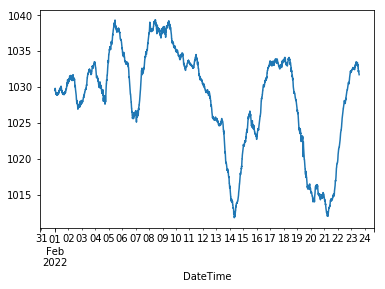

In [36]:
g4_rs[g4_rs.index >= pd.to_datetime('2022-02-01')]['Bar  '].plot()

In [37]:
g4_rs.columns

Index(['Temp Out', 'Hi Temp', 'Low Temp', 'Wind Speed', 'Wind Dir', 'Bar  ',
       'Rain', 'Rain Rate', 'Out Hum'],
      dtype='object')

In [38]:
g4_rs[g4_rs.index >= pd.to_datetime('2022-02-23')]['Rain'].sum()

0.0

# Exploratory

In [39]:
# This is just for testing dataframe formats
df_cols = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'ATG_Roof']
df_ind = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'ATG_Roof']
df_temp = pd.DataFrame(columns=df_cols, index=df_ind)
df_temp

,Group_1,Group_2,Group_3,Group_4,Group_5,ATG_Roof
Group_1,NaN,NaN,NaN,NaN,NaN,NaN
Group_2,NaN,NaN,NaN,NaN,NaN,NaN
Group_3,NaN,NaN,NaN,NaN,NaN,NaN
Group_4,NaN,NaN,NaN,NaN,NaN,NaN
Group_5,NaN,NaN,NaN,NaN,NaN,NaN
ATG_Roof,NaN,NaN,NaN,NaN,NaN,NaN


goal: Create a loop that will take in all 5 group data of a given quantity and return a correlation table (or other calc)<br>
how? merge them one by one, this will match all the times together automatically so only meaningful comparisons are made.<br>

In [40]:
# Make a list to hold all the analysis dataframes
dfs = [g1_rs, g2_rs, g3_rs, g4_rs, g5_rs, atg]

In [41]:
def merge_davis_obs(dfs, column='Temp Out',quantity=''):
    '''
    Author: Alex Hewett (ahewett@uw.edu)
    Takes in multiple dataframes for the 5 groups and a given quantity and merges them together for further analysis
    
    dfs = list of dataframes containing each group data.
    quantity = string, name of quanity to be appended to column titles ie: quantity = Temperature -> "Group_5 Temperature"
    '''
    dfs = [df[[column]].dropna() for df in dfs]
    df_cols = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'ATG_Roof']
    quantity = " " + quantity
    merged1 = dfs[0].merge(dfs[1], right_index=True, left_index=True)
    merged1 = merged1.rename(columns={merged1.columns[0]: df_cols[0] + quantity,
                                      merged1.columns[1]: df_cols[1] + quantity})
    merged2 = merged1.merge(dfs[2], right_index=True, left_index=True)
    merged2 = merged2.rename(columns={merged2.columns[2]: df_cols[2] + quantity})
    merged3 = merged2.merge(dfs[3], right_index=True, left_index=True)
    merged3 = merged3.rename(columns={merged3.columns[3]: df_cols[3] + quantity})
    merged4 = merged3.merge(dfs[4], right_index=True, left_index=True)
    merged4 = merged4.rename(columns={merged4.columns[4]: df_cols[4] + quantity})
    merged5 = merged4.merge(dfs[5], right_index=True, left_index=True)
    merged5 = merged5.rename(columns={merged5.columns[5]: df_cols[5] + quantity})
    
    return merged5

### This 'get reg table' function makes pivot tables with gains, offsets, and their errors. But it doesn't look pretty so there is also a "get reg matrix" function that gives the 6x6 tables

In [42]:
def get_reg_table(obs):
    # Get columns from input dataframe
    obs_cols = obs.columns
    # init empty lists to hold the regression stats
    slopes = []
    slope_err = []
    offset = []
    offset_err = []
    # Do linear regression for each group....
    for y in obs_cols:
        # With each other group...
        for x in obs_cols:
            g, h = np.polyfit(obs[x], obs[y], 1, cov=True)
            # append all the regression values to the respective lists
            slopes.append(np.round(g[0], 3))
            slope_err.append(np.round(np.sqrt(h[0][0]), 3))
            offset.append(np.round(g[1], 2))
            offset_err.append(np.round(np.sqrt(h[1][1]), 3))
    # now we make a new set of columns to put everything in
    # Get the index columns
    y = []
    name_ind = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'ATG Roof']
    for name in name_ind:
        for i in range(6):
            y.append(name)
    x = name_ind*6
    # Make the new dataframe and then put everythin in
    reg_cols = ['Dependent Variable', 'Independent Variable', 'Gain Bias', 'Gain Bias Error', 'Offset Bias', 'Offset Bias Error']
    reg = pd.DataFrame(columns=reg_cols)
    reg.iloc[:, 0] = y
    reg.iloc[:, 1] = x
    reg.iloc[:, 2] = slopes
    reg.iloc[:, 3] = slope_err
    reg.iloc[:, 4] = offset
    reg.iloc[:, 5] = offset_err
    # Make a nice pivot table to group everything and view nicely, replace 0's with <0.01
    # We do this handling of small values to make the table more readable and since below .01 becomes insignificant in meaning
    reg_pivot = pd.pivot_table(reg, index=['Dependent Variable', 'Independent Variable']).replace(0.000, '< 0.001')
    
    return reg_pivot

# Temperature

### A quick note for time sampling. Below, you see the temp_obs dataframe is sampled for dates >= feb 01, you can sample wherever you want by modifying that block. Do the same for the other dataframes (pressure, etc.) if you need to.

In [43]:
temp_obs = merge_davis_obs(dfs, column='Temp Out', quantity='Temperature')
temp_obs = temp_obs[temp_obs.index >= pd.to_datetime('2022-02-01')]

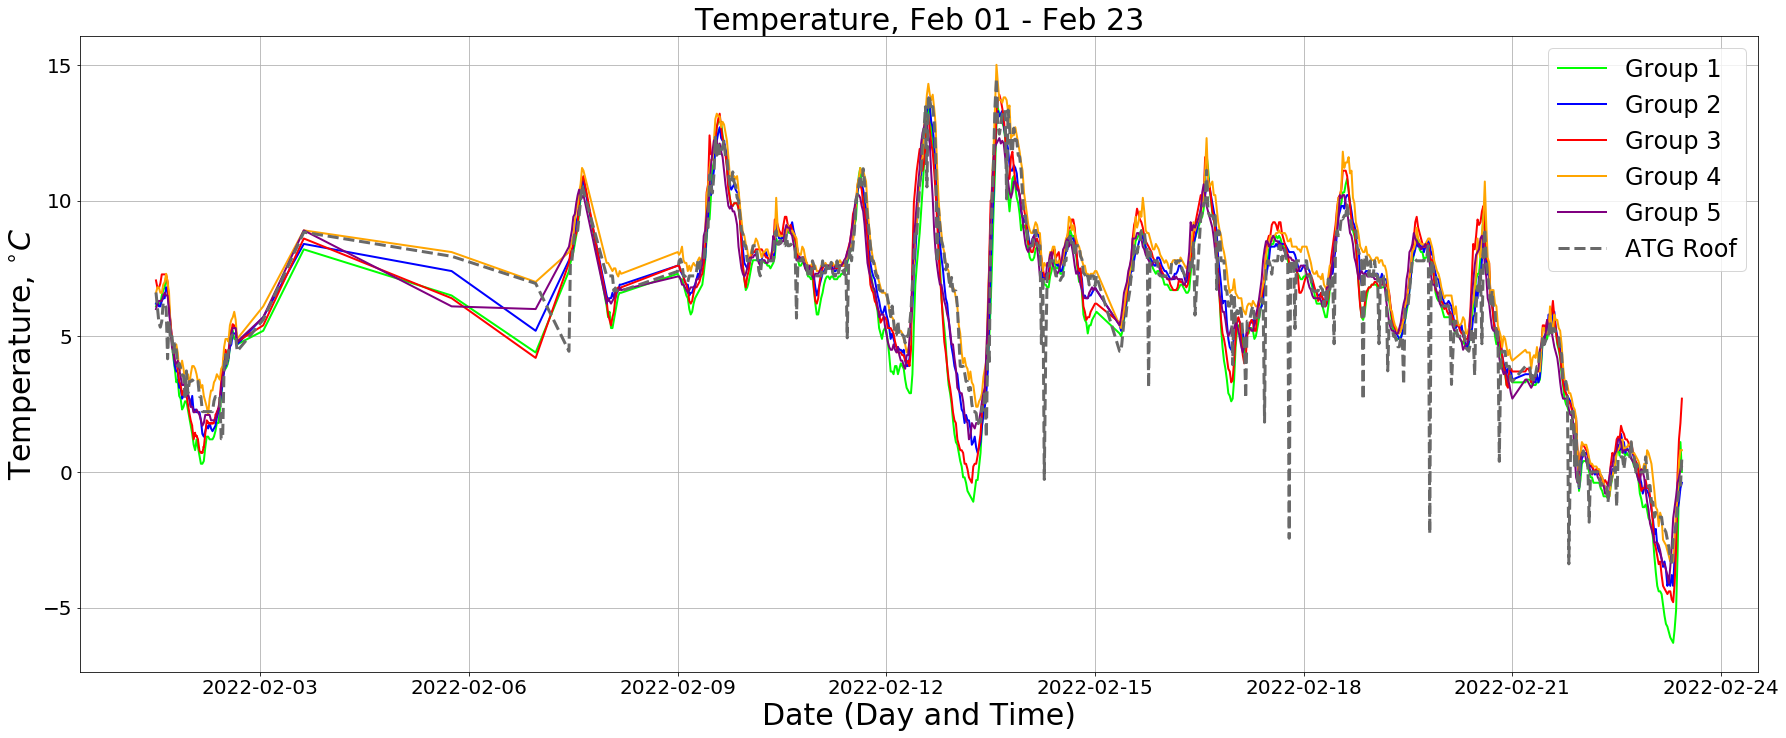

In [44]:
fig = plt.subplots(figsize=(25, 10))

plt.plot(temp_obs.index, temp_obs['Group_1 Temperature'], 'lime', label = 'Group 1',  linewidth=2)
plt.plot(temp_obs.index, temp_obs['Group_2 Temperature'], 'blue', label = 'Group 2',  linewidth=2)
plt.plot(temp_obs.index, temp_obs['Group_3 Temperature'], 'red', label = 'Group 3',  linewidth=2)
plt.plot(temp_obs.index, temp_obs['Group_4 Temperature'], 'orange', label = 'Group 4',  linewidth=2)
plt.plot(temp_obs.index, temp_obs['Group_5 Temperature'], 'purple', label = 'Group 5',  linewidth=2)
plt.plot(temp_obs.index, temp_obs['ATG_Roof Temperature'], 'dimgray', label = 'ATG Roof',  linestyle = 'dashed', linewidth=3)


plt.grid()
plt.legend(loc='best', fontsize='24')
plt.xlabel('Date (Day and Time)', fontsize='30')
plt.ylabel(r'Temperature, $^{\circ} C$', fontsize='30')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')


# locs,_ = plt.xticks()
#plt.xticks(range(1,len(locs),500),rotation=90)

plt.tight_layout()
plt.title('Temperature, Feb 01 - Feb 23', fontsize='30')
plt.savefig('temperature_ts.png')
plt.show()

In [45]:
temp_obs.corr()

,Group_1 Temperature,Group_2 Temperature,Group_3 Temperature,Group_4 Temperature,Group_5 Temperature,ATG_Roof Temperature
Group_1 Temperature,1.000000,0.986481,0.988946,0.963844,0.971708,0.917853
Group_2 Temperature,0.986481,1.000000,0.979868,0.986901,0.982356,0.948482
Group_3 Temperature,0.988946,0.979868,1.000000,0.959000,0.978967,0.914432
Group_4 Temperature,0.963844,0.986901,0.959000,1.000000,0.971178,0.957891
Group_5 Temperature,0.971708,0.982356,0.978967,0.971178,1.000000,0.933192
ATG_Roof Temperature,0.917853,0.948482,0.914432,0.957891,0.933192,1.000000


In [102]:
get_min_max_corr(temp_obs)

min: 0.9144324328385689
max: 0.9889460421415802


# This function will give you regression tables

In [46]:
def get_reg_matrix(obs):
    '''
    Author: Alex Hewett (ahewett@uw.edu)
    # Takes in a dataframe with quantity data for all groups and returns matrices for gain, offset biases and errors
    
    # Empty matrices to put vals from regression in
    
    usage: slope, slope_error, offset, offset_bias = get_reg_matrix(obs)
    ****** Make sure to give the function 4 names to store each respective dataframe ******
    '''
    offset = np.zeros((6,6))
    offset_err = np.zeros((6,6))
    slope = np.zeros((6,6))
    slope_err = np.zeros((6,6))
    
    # For each Group...
    for i in range(6):
        # Regress against every other group...
        for j in range(6):
            # Get regression stats
            a, b = np.polyfit(obs.values[:, i],obs.values[:, j], 1, cov=True)
            offset[i, j] = a[1]
            offset_err[i, j] = np.sqrt(b[1][1])
            slope[i, j] = a[0]
            slope_err[i, j] = np.sqrt(b[0][0])
    # Create the matrices. Use nulled obs.corr() to get the indices and columns easily       
    offset_matrix = (obs.corr() - obs.corr()) + offset.round(7)
    offset_err_matrix = (obs.corr() - obs.corr()) + offset_err.round(7)
    slope_matrix = (obs.corr() - obs.corr()) + slope.round(7)
    slope_err_matrix = (obs.corr() - obs.corr()) + slope_err.round(7)
    

    return slope_matrix, slope_err_matrix, offset_matrix, offset_err_matrix

In [47]:
t_slope, t_slope_err, t_offset, t_offset_err = get_reg_matrix(temp_obs)

### Temp Gain

In [48]:
t_slope

,Group_1 Temperature,Group_2 Temperature,Group_3 Temperature,Group_4 Temperature,Group_5 Temperature,ATG_Roof Temperature
Group_1 Temperature,1.000000,0.925516,0.961500,0.890756,0.877222,0.849470
Group_2 Temperature,1.051462,1.000000,1.015428,0.972143,0.945252,0.935641
Group_3 Temperature,1.017175,0.945553,1.000000,0.911578,0.909002,0.870462
Group_4 Temperature,1.042929,1.001882,1.008890,1.000000,0.948682,0.959266
Group_5 Temperature,1.076370,1.020916,1.054316,0.994208,1.000000,0.956692
ATG_Roof Temperature,0.991740,0.961500,0.960624,0.956517,0.910270,1.000000


In [49]:
t_slope_err

,Group_1 Temperature,Group_2 Temperature,Group_3 Temperature,Group_4 Temperature,Group_5 Temperature,ATG_Roof Temperature
Group_1 Temperature,0.000000,0.005505,0.005162,0.008818,0.007634,0.013153
Group_2 Temperature,0.006254,0.000000,0.007408,0.005690,0.006443,0.011191
Group_3 Temperature,0.005461,0.006898,0.000000,0.009646,0.006783,0.013795
Group_4 Temperature,0.010324,0.005864,0.010675,0.000000,0.008337,0.010296
Group_5 Temperature,0.009368,0.006959,0.007867,0.008737,0.000000,0.013192
ATG_Roof Temperature,0.015356,0.011500,0.015224,0.010266,0.012552,0.000000


In [50]:
t_offset

,Group_1 Temperature,Group_2 Temperature,Group_3 Temperature,Group_4 Temperature,Group_5 Temperature,ATG_Roof Temperature
Group_1 Temperature,0.000000,0.867105,0.644070,1.720242,1.071816,1.319903
Group_2 Temperature,-0.760422,0.000000,-0.114118,0.826705,0.265570,0.415747
Group_3 Temperature,-0.531259,0.350318,0.000000,1.213540,0.504473,0.829808
Group_4 Temperature,-1.394029,-0.669972,-0.737486,0.000000,-0.378851,-0.358447
Group_5 Temperature,-0.839366,-0.058406,-0.279574,0.759518,0.000000,0.352190
ATG_Roof Temperature,-0.421341,0.210749,0.195809,0.898463,0.456174,0.000000


In [51]:
t_offset_err

,Group_1 Temperature,Group_2 Temperature,Group_3 Temperature,Group_4 Temperature,Group_5 Temperature,ATG_Roof Temperature
Group_1 Temperature,0.000000,0.036625,0.034342,0.058665,0.050794,0.087510
Group_2 Temperature,0.043333,0.000000,0.051328,0.039425,0.044645,0.077537
Group_3 Temperature,0.038059,0.048078,0.000000,0.067226,0.047274,0.096146
Group_4 Temperature,0.077331,0.043925,0.079964,0.000000,0.062446,0.077120
Group_5 Temperature,0.063794,0.047392,0.053576,0.059497,0.000000,0.089835
ATG_Roof Temperature,0.106398,0.079681,0.105483,0.071132,0.086967,0.000000


In [52]:
temp_reg = get_reg_table(temp_obs)
temp_reg

Gain Bias Gain Bias Error  \
Dependent Variable Independent Variable                              
ATG Roof           ATG Roof                  1.000         < 0.001   
                   Group 1                   0.849           0.013   
                   Group 2                   0.936           0.011   
                   Group 3                   0.870           0.014   
                   Group 4                   0.959            0.01   
                   Group 5                   0.957           0.013   
Group 1            ATG Roof                  0.992           0.015   
                   Group 1                   1.000         < 0.001   
                   Group 2                   1.051           0.006   
                   Group 3                   1.017           0.005   
                   Group 4                   1.043            0.01   
                   Group 5                   1.076           0.009   
Group 2            ATG Roof                  0.962           0.012   
                   Group 1                   0.926           0.006   
                   Group 2                   1.000         < 0.001   
                   Group 3                   0.946           0.007   
                   Group 4                   1.002           0.006   
                   Group 5                   1.021           0.007   
Group 3            ATG Roof                  0.961           0.015   
                   Group 1                   0.962           0.005   
                   Group 2                   1.015           0.007   
                   Group 3                   1.000         < 0.001   
                   Group 4                   1.009           0.011   
                   Group 5                   1.054           0.008   
Group 4            ATG Roof                  0.957            0.01   
                   Group 1                   0.891           0.009   
                   Group 2                   0.972           0.006   
                   Group 3                   0.912            0.01   
                   Group 4                   1.000         < 0.001   
                   Group 5                   0.994           0.009   
Group 5            ATG Roof                  0.910           0.013   
                   Group 1                   0.877           0.008   
                   Group 2                   0.945           0.006   
                   Group 3                   0.909           0.007   
                   Group 4                   0.949           0.008   
                   Group 5                   1.000         < 0.001   

                                        Offset Bias Offset Bias Error  
Dependent Variable Independent Variable                                
ATG Roof           ATG Roof                 < 0.001           < 0.001  
                   Group 1                     1.32             0.088  
                   Group 2                     0.42             0.078  
                   Group 3                     0.83             0.096  
                   Group 4                    -0.36             0.077  
                   Group 5                     0.35              0.09  
Group 1            ATG Roof                   -0.42             0.106  
                   Group 1                  < 0.001           < 0.001  
                   Group 2                    -0.76             0.043  
                   Group 3                    -0.53             0.038  
                   Group 4                    -1.39             0.077  
                   Group 5                    -0.84             0.064  
Group 2            ATG Roof                    0.21              0.08  
                   Group 1                     0.87             0.037  
                   Group 2                  < 0.001           < 0.001  
                   Group 3                     0.35             0.048  
                   Group 4                    -0.67             0.044  
            

# Wind

In [53]:
wind_speed_obs = merge_davis_obs(dfs, column='Wind Speed',quantity='Wind Speed')
wind_speed_obs = wind_speed_obs[wind_speed_obs.index >= pd.to_datetime('2022-02-01')]

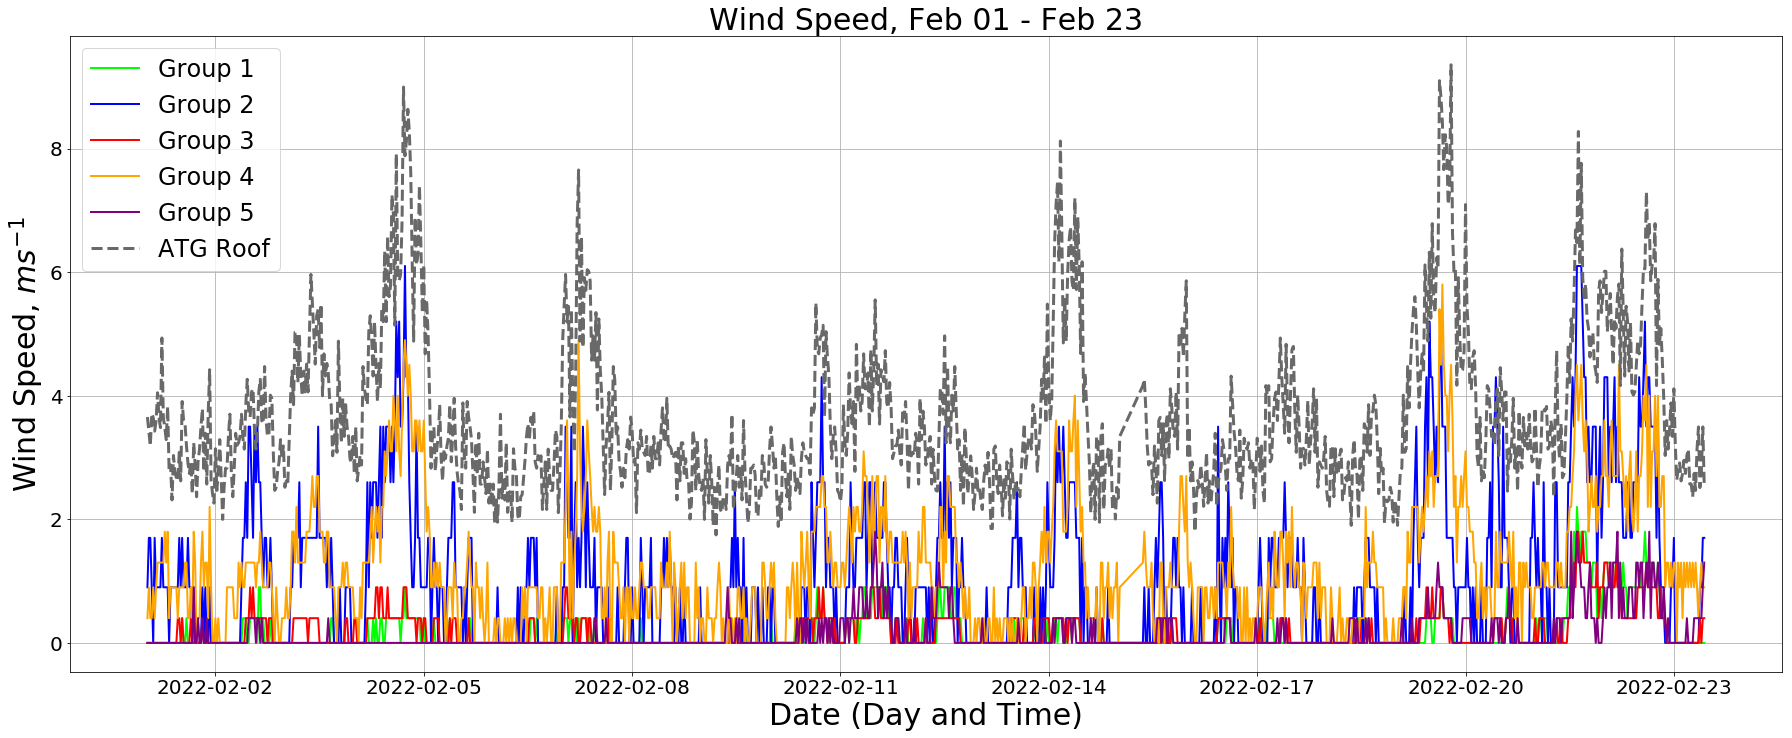

In [54]:
fig = plt.subplots(figsize=(25, 10))

plt.plot(wind_speed_obs.index, wind_speed_obs['Group_1 Wind Speed'], 'lime', label = 'Group 1',  linewidth=2)
plt.plot(wind_speed_obs.index, wind_speed_obs['Group_2 Wind Speed'], 'blue', label = 'Group 2',  linewidth=2)
plt.plot(wind_speed_obs.index, wind_speed_obs['Group_3 Wind Speed'], 'red', label = 'Group 3',  linewidth=2)
plt.plot(wind_speed_obs.index, wind_speed_obs['Group_4 Wind Speed'], 'orange', label = 'Group 4',  linewidth=2)
plt.plot(wind_speed_obs.index, wind_speed_obs['Group_5 Wind Speed'], 'purple', label = 'Group 5',  linewidth=2)
plt.plot(wind_speed_obs.index, wind_speed_obs['ATG_Roof Wind Speed'], 'dimgray', label = 'ATG Roof',  linestyle = 'dashed', linewidth=3)


plt.grid()
plt.legend(loc='best', fontsize='24')
plt.xlabel('Date (Day and Time)', fontsize='30')
plt.ylabel(r'Wind Speed, $ms^{-1}$', fontsize='30')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')


# locs,_ = plt.xticks()
#plt.xticks(range(1,len(locs),500),rotation=90)

plt.tight_layout()
plt.title('Wind Speed, Feb 01 - Feb 23', fontsize='30')
plt.savefig('windspeed_ts.png')
plt.show()

In [55]:
wind_speed_obs.corr()

,Group_1 Wind Speed,Group_2 Wind Speed,Group_3 Wind Speed,Group_4 Wind Speed,Group_5 Wind Speed,ATG_Roof Wind Speed
Group_1 Wind Speed,1.000000,0.671625,0.765404,0.601835,0.663800,0.514414
Group_2 Wind Speed,0.671625,1.000000,0.738672,0.698863,0.492459,0.691959
Group_3 Wind Speed,0.765404,0.738672,1.000000,0.619956,0.590907,0.580786
Group_4 Wind Speed,0.601835,0.698863,0.619956,1.000000,0.455163,0.879663
Group_5 Wind Speed,0.663800,0.492459,0.590907,0.455163,1.000000,0.361229
ATG_Roof Wind Speed,0.514414,0.691959,0.580786,0.879663,0.361229,1.000000


In [101]:
get_min_max_corr(wind_speed_obs)

min: 0.361228698582355
max: 0.879663149732568


In [56]:
ws_slope, ws_slope_err, ws_offset, ws_offset_err = get_reg_matrix(wind_speed_obs)

In [57]:
ws_slope

,Group_1 Wind Speed,Group_2 Wind Speed,Group_3 Wind Speed,Group_4 Wind Speed,Group_5 Wind Speed,ATG_Roof Wind Speed
Group_1 Wind Speed,1.000000,2.445960,0.670160,1.818948,0.608889,1.955730
Group_2 Wind Speed,0.184418,1.000000,0.177589,0.579979,0.124036,0.722359
Group_3 Wind Speed,0.874184,3.072464,1.000000,2.140011,0.619061,2.521877
Group_4 Wind Speed,0.199129,0.842117,0.179600,1.000000,0.138142,1.106545
Group_5 Wind Speed,0.723662,1.955202,0.564035,1.499715,1.000000,1.497189
ATG_Roof Wind Speed,0.135306,0.662838,0.133754,0.699300,0.087154,1.000000


In [58]:
ws_slope_err

,Group_1 Wind Speed,Group_2 Wind Speed,Group_3 Wind Speed,Group_4 Wind Speed,Group_5 Wind Speed,ATG_Roof Wind Speed
Group_1 Wind Speed,0.000000,0.081207,0.016958,0.072644,0.020647,0.098122
Group_2 Wind Speed,0.006123,0.000000,0.004877,0.017865,0.006598,0.022682
Group_3 Wind Speed,0.022121,0.084382,0.000000,0.081515,0.025437,0.106384
Group_4 Wind Speed,0.007953,0.025939,0.006841,0.000000,0.008133,0.018006
Group_5 Wind Speed,0.024539,0.103998,0.023176,0.088297,0.000000,0.116318
ATG_Roof Wind Speed,0.006789,0.020813,0.005642,0.011379,0.006771,0.000000


In [59]:
ws_offset

,Group_1 Wind Speed,Group_2 Wind Speed,Group_3 Wind Speed,Group_4 Wind Speed,Group_5 Wind Speed,ATG_Roof Wind Speed
Group_1 Wind Speed,0.000000,0.627282,0.062374,0.919336,0.040914,3.325062
Group_2 Wind Speed,-0.023616,0.000000,-0.009479,0.622671,0.014347,2.903616
Group_3 Wind Speed,0.014937,0.500536,0.000000,0.850394,0.034842,3.212322
Group_4 Wind Speed,-0.076094,0.006425,-0.045130,0.000000,-0.026105,2.298213
Group_5 Wind Speed,0.064210,0.757854,0.094096,1.009896,0.000000,3.438925
ATG_Roof Wind Speed,-0.326562,-1.383878,-0.313841,-1.330187,-0.175343,0.000000


In [60]:
ws_offset_err

,Group_1 Wind Speed,Group_2 Wind Speed,Group_3 Wind Speed,Group_4 Wind Speed,Group_5 Wind Speed,ATG_Roof Wind Speed
Group_1 Wind Speed,0.000000,0.030163,0.006299,0.026983,0.007669,0.036446
Group_2 Wind Speed,0.009745,0.000000,0.007763,0.028434,0.010501,0.036101
Group_3 Wind Speed,0.007493,0.028584,0.000000,0.027613,0.008616,0.036037
Group_4 Wind Speed,0.012580,0.041034,0.010822,0.000000,0.012866,0.028483
Group_5 Wind Speed,0.008245,0.034940,0.007786,0.029665,0.000000,0.039079
ATG_Roof Wind Speed,0.026233,0.080428,0.021804,0.043971,0.026165,0.000000


In [61]:
wind_speed_reg = get_reg_table(wind_speed_obs)
wind_speed_reg

Gain Bias Gain Bias Error  \
Dependent Variable Independent Variable                              
ATG Roof           ATG Roof                  1.000         < 0.001   
                   Group 1                   1.956           0.098   
                   Group 2                   0.722           0.023   
                   Group 3                   2.522           0.106   
                   Group 4                   1.107           0.018   
                   Group 5                   1.497           0.116   
Group 1            ATG Roof                  0.135           0.007   
                   Group 1                   1.000         < 0.001   
                   Group 2                   0.184           0.006   
                   Group 3                   0.874           0.022   
                   Group 4                   0.199           0.008   
                   Group 5                   0.724           0.025   
Group 2            ATG Roof                  0.663           0.021   
                   Group 1                   2.446           0.081   
                   Group 2                   1.000         < 0.001   
                   Group 3                   3.072           0.084   
                   Group 4                   0.842           0.026   
                   Group 5                   1.955           0.104   
Group 3            ATG Roof                  0.134           0.006   
                   Group 1                   0.670           0.017   
                   Group 2                   0.178           0.005   
                   Group 3                   1.000         < 0.001   
                   Group 4                   0.180           0.007   
                   Group 5                   0.564           0.023   
Group 4            ATG Roof                  0.699           0.011   
                   Group 1                   1.819           0.073   
                   Group 2                   0.580           0.018   
                   Group 3                   2.140           0.082   
                   Group 4                   1.000         < 0.001   
                   Group 5                   1.500           0.088   
Group 5            ATG Roof                  0.087           0.007   
                   Group 1                   0.609           0.021   
                   Group 2                   0.124           0.007   
                   Group 3                   0.619           0.025   
                   Group 4                   0.138           0.008   
                   Group 5                   1.000         < 0.001   

                                        Offset Bias Offset Bias Error  
Dependent Variable Independent Variable                                
ATG Roof           ATG Roof                 < 0.001           < 0.001  
                   Group 1                     3.33             0.036  
                   Group 2                      2.9             0.036  
                   Group 3                     3.21             0.036  
                   Group 4                      2.3             0.028  
                   Group 5                     3.44             0.039  
Group 1            ATG Roof                   -0.33             0.026  
                   Group 1                  < 0.001           < 0.001  
                   Group 2                    -0.02              0.01  
                   Group 3                     0.01             0.007  
                   Group 4                    -0.08             0.013  
                   Group 5                     0.06             0.008  
Group 2            ATG Roof                   -1.38              0.08  
                   Group 1                     0.63              0.03  
                   Group 2                  < 0.001           < 0.001  
                   Group 3                      0.5             0.029  
                   Group 4                     0.01             0.041  
            

# Wind Direction

In [62]:
wind_dir_obs = merge_davis_obs(dfs, column='Wind Dir', quantity='Wind Direction')
wind_dir_obs = wind_dir_obs[wind_dir_obs.index >= pd.to_datetime('2022-02-01')]

In [63]:
wind_dir_obs.corr()

,Group_1 Wind Direction,Group_2 Wind Direction,Group_3 Wind Direction,Group_4 Wind Direction,Group_5 Wind Direction,ATG_Roof Wind Direction
Group_1 Wind Direction,1.000000,0.195692,0.369174,0.601679,-0.347609,0.581823
Group_2 Wind Direction,0.195692,1.000000,0.272277,0.093885,-0.113544,0.199801
Group_3 Wind Direction,0.369174,0.272277,1.000000,0.357038,-0.243900,0.401089
Group_4 Wind Direction,0.601679,0.093885,0.357038,1.000000,-0.278827,0.682606
Group_5 Wind Direction,-0.347609,-0.113544,-0.243900,-0.278827,1.000000,-0.329687
ATG_Roof Wind Direction,0.581823,0.199801,0.401089,0.682606,-0.329687,1.000000


In [100]:
get_min_max_corr(wind_dir_obs)

min: -0.34760868621315993
max: 0.6826062699356349


In [64]:
wd_slope, wd_slope_err, wd_offset, wd_offset_err = get_reg_matrix(wind_dir_obs)

In [65]:
wd_slope

,Group_1 Wind Direction,Group_2 Wind Direction,Group_3 Wind Direction,Group_4 Wind Direction,Group_5 Wind Direction,ATG_Roof Wind Direction
Group_1 Wind Direction,1.000000,0.212596,0.392008,0.653253,-0.283204,0.496559
Group_2 Wind Direction,0.180133,1.000000,0.266131,0.093828,-0.085152,0.156964
Group_3 Wind Direction,0.347670,0.278566,1.000000,0.365062,-0.187135,0.322371
Group_4 Wind Direction,0.554177,0.093942,0.349190,1.000000,-0.209231,0.536579
Group_5 Wind Direction,-0.426660,-0.151404,-0.317882,-0.371572,1.000000,-0.345361
ATG_Roof Wind Direction,0.681728,0.254331,0.499028,0.868374,-0.314725,1.000000


In [66]:
wd_slope_err

,Group_1 Wind Direction,Group_2 Wind Direction,Group_3 Wind Direction,Group_4 Wind Direction,Group_5 Wind Direction,ATG_Roof Wind Direction
Group_1 Wind Direction,0.000000,0.049619,0.045962,0.040390,0.035579,0.032329
Group_2 Wind Direction,0.042043,0.000000,0.043803,0.046341,0.034702,0.035851
Group_3 Wind Direction,0.040763,0.045850,0.000000,0.044483,0.034656,0.034291
Group_4 Wind Direction,0.034264,0.046397,0.042549,0.000000,0.033564,0.026755
Group_5 Wind Direction,0.053602,0.061703,0.058869,0.059605,0.000000,0.046061
ATG_Roof Wind Direction,0.044384,0.058090,0.053082,0.043299,0.041975,0.000000


In [67]:
wd_offset

,Group_1 Wind Direction,Group_2 Wind Direction,Group_3 Wind Direction,Group_4 Wind Direction,Group_5 Wind Direction,ATG_Roof Wind Direction
Group_1 Wind Direction,0.000000,111.090555,118.674752,56.084237,214.997230,89.321955
Group_2 Wind Direction,193.225577,0.000000,163.484335,186.082461,165.676498,174.586868
Group_3 Wind Direction,150.249030,100.957508,0.000000,125.874171,190.676887,133.145403
Group_4 Wind Direction,110.377763,139.353337,135.431629,0.000000,194.243607,91.608833
Group_5 Wind Direction,286.666805,181.273069,253.976609,257.483040,0.000000,251.988088
ATG_Roof Wind Direction,85.775684,107.509537,106.076365,27.755028,214.966371,0.000000


In [68]:
wd_offset_err

,Group_1 Wind Direction,Group_2 Wind Direction,Group_3 Wind Direction,Group_4 Wind Direction,Group_5 Wind Direction,ATG_Roof Wind Direction
Group_1 Wind Direction,0.000000,12.086545,11.195649,9.838339,8.666539,7.874811
Group_2 Wind Direction,8.091429,0.000000,8.430289,8.918637,6.678753,6.899827
Group_3 Wind Direction,9.449408,10.628566,0.000000,10.311592,8.033626,7.949041
Group_4 Wind Direction,7.840478,10.616862,9.736238,0.000000,7.680203,6.122221
Group_5 Wind Direction,9.271157,10.672363,10.182269,10.309561,0.000000,7.966942
ATG_Roof Wind Direction,9.640434,12.617450,11.529644,9.404694,9.117166,0.000000


In [69]:
wind_dir_reg = get_reg_table(wind_dir_obs)
wind_dir_reg

Gain Bias Gain Bias Error  \
Dependent Variable Independent Variable                              
ATG Roof           ATG Roof                  1.000         < 0.001   
                   Group 1                   0.497           0.032   
                   Group 2                   0.157           0.036   
                   Group 3                   0.322           0.034   
                   Group 4                   0.537           0.027   
                   Group 5                  -0.345           0.046   
Group 1            ATG Roof                  0.682           0.044   
                   Group 1                   1.000         < 0.001   
                   Group 2                   0.180           0.042   
                   Group 3                   0.348           0.041   
                   Group 4                   0.554           0.034   
                   Group 5                  -0.427           0.054   
Group 2            ATG Roof                  0.254           0.058   
                   Group 1                   0.213            0.05   
                   Group 2                   1.000         < 0.001   
                   Group 3                   0.279           0.046   
                   Group 4                   0.094           0.046   
                   Group 5                  -0.151           0.062   
Group 3            ATG Roof                  0.499           0.053   
                   Group 1                   0.392           0.046   
                   Group 2                   0.266           0.044   
                   Group 3                   1.000         < 0.001   
                   Group 4                   0.349           0.043   
                   Group 5                  -0.318           0.059   
Group 4            ATG Roof                  0.868           0.043   
                   Group 1                   0.653            0.04   
                   Group 2                   0.094           0.046   
                   Group 3                   0.365           0.044   
                   Group 4                   1.000         < 0.001   
                   Group 5                  -0.372            0.06   
Group 5            ATG Roof                 -0.315           0.042   
                   Group 1                  -0.283           0.036   
                   Group 2                  -0.085           0.035   
                   Group 3                  -0.187           0.035   
                   Group 4                  -0.209           0.034   
                   Group 5                   1.000         < 0.001   

                                        Offset Bias Offset Bias Error  
Dependent Variable Independent Variable                                
ATG Roof           ATG Roof                 < 0.001           < 0.001  
                   Group 1                    89.32             7.875  
                   Group 2                   174.59               6.9  
                   Group 3                   133.15             7.949  
                   Group 4                    91.61             6.122  
                   Group 5                   251.99             7.967  
Group 1            ATG Roof                   85.78              9.64  
                   Group 1                  < 0.001           < 0.001  
                   Group 2                   193.23             8.091  
                   Group 3                   150.25             9.449  
                   Group 4                   110.38              7.84  
                   Group 5                   286.67             9.271  
Group 2            ATG Roof                  107.51            12.617  
                   Group 1                   111.09            12.087  
                   Group 2                  < 0.001           < 0.001  
                   Group 3                   100.96            10.629  
                   Group 4                   139.35            10.617  
            

# Pressure

In [70]:
press_obs = merge_davis_obs(dfs, column='Bar  ', quantity='Pressure')
press_obs = press_obs[press_obs.index >= pd.to_datetime('2022-02-01')]

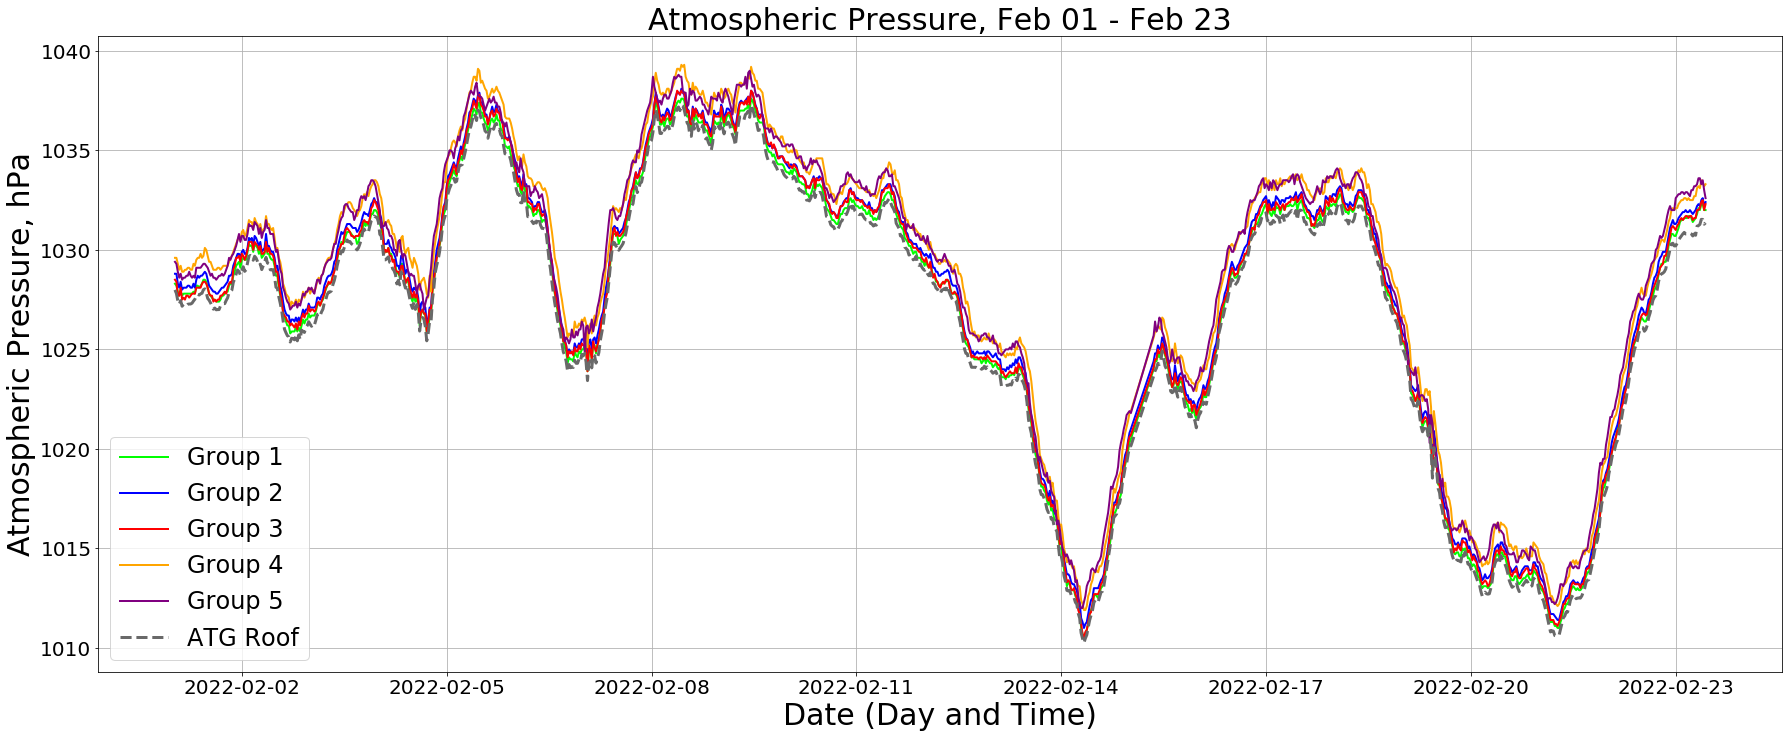

In [71]:
fig = plt.subplots(figsize=(25, 10))

plt.plot(press_obs.index, press_obs['Group_1 Pressure'], 'lime', label = 'Group 1',  linewidth=2)
plt.plot(press_obs.index, press_obs['Group_2 Pressure'], 'blue', label = 'Group 2',  linewidth=2)
plt.plot(press_obs.index, press_obs['Group_3 Pressure'], 'red', label = 'Group 3',  linewidth=2)
plt.plot(press_obs.index, press_obs['Group_4 Pressure'], 'orange', label = 'Group 4',  linewidth=2)
plt.plot(press_obs.index, press_obs['Group_5 Pressure'], 'purple', label = 'Group 5',  linewidth=2)
plt.plot(press_obs.index, press_obs['ATG_Roof Pressure'], 'dimgray', label = 'ATG Roof',  linestyle = 'dashed', linewidth=3)


plt.grid()
plt.legend(loc='best', fontsize='24')
plt.xlabel('Date (Day and Time)', fontsize='30')
plt.ylabel('Atmospheric Pressure, hPa', fontsize='30')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')


# locs,_ = plt.xticks()
#plt.xticks(range(1,len(locs),500),rotation=90)

plt.tight_layout()
plt.title('Atmospheric Pressure, Feb 01 - Feb 23', fontsize='30')
plt.savefig("pressure_ts.png")
plt.show()

In [72]:
press_obs.corr()

,Group_1 Pressure,Group_2 Pressure,Group_3 Pressure,Group_4 Pressure,Group_5 Pressure,ATG_Roof Pressure
Group_1 Pressure,1.000000,0.999931,0.999785,0.999568,0.997722,0.999867
Group_2 Pressure,0.999931,1.000000,0.999789,0.999569,0.997751,0.999879
Group_3 Pressure,0.999785,0.999789,1.000000,0.999408,0.997561,0.999788
Group_4 Pressure,0.999568,0.999569,0.999408,1.000000,0.997150,0.999510
Group_5 Pressure,0.997722,0.997751,0.997561,0.997150,1.000000,0.997929
ATG_Roof Pressure,0.999867,0.999879,0.999788,0.999510,0.997929,1.000000


In [98]:
def get_min_max_corr(obs):
    x = obs.corr()
    y = x.min()
    x = x[x != 1]
    x = x.max()
    max_corr = x.max()
    min_corr = y.min()
    print(f'min: {min_corr}\nmax: {max_corr}')

In [99]:
get_min_max_corr(press_obs)

min: 0.9971503841264336
max: 0.9999311703400964


In [73]:
p_slope, p_slope_err, p_offset, p_offset_err = get_reg_matrix(press_obs)

In [74]:
p_slope

,Group_1 Pressure,Group_2 Pressure,Group_3 Pressure,Group_4 Pressure,Group_5 Pressure,ATG_Roof Pressure
Group_1 Pressure,1.000000,0.998551,1.003961,1.004343,0.993099,0.997388
Group_2 Pressure,1.001313,1.000000,1.005354,1.005732,0.994501,0.998779
Group_3 Pressure,0.995625,0.994255,1.000000,1.000004,0.988808,0.993159
Group_4 Pressure,0.994816,0.993444,0.998812,1.000000,0.987811,0.992291
Group_5 Pressure,1.002367,1.001012,1.006392,1.006578,1.000000,1.000089
ATG_Roof Pressure,1.002353,1.000981,1.006460,1.006780,0.995774,1.000000


In [105]:
p_slope.min()

Group_1 Pressure     0.994816
Group_2 Pressure     0.993444
Group_3 Pressure     0.998812
Group_4 Pressure     1.000000
Group_5 Pressure     0.987811
ATG_Roof Pressure    0.992291
dtype: float64

In [106]:
p_slope.max()

Group_1 Pressure     1.002367
Group_2 Pressure     1.001012
Group_3 Pressure     1.006460
Group_4 Pressure     1.006780
Group_5 Pressure     1.000000
ATG_Roof Pressure    1.000089
dtype: float64

In [75]:
p_slope_err

,Group_1 Pressure,Group_2 Pressure,Group_3 Pressure,Group_4 Pressure,Group_5 Pressure,ATG_Roof Pressure
Group_1 Pressure,0.000000,0.000353,0.000627,0.000888,0.002021,0.000489
Group_2 Pressure,0.000354,0.000000,0.000621,0.000889,0.002011,0.000467
Group_3 Pressure,0.000622,0.000615,0.000000,0.001036,0.002082,0.000616
Group_4 Pressure,0.000880,0.000878,0.001035,0.000000,0.002249,0.000936
Group_5 Pressure,0.002040,0.002024,0.002119,0.002292,0.000000,0.001940
ATG_Roof Pressure,0.000491,0.000468,0.000624,0.000949,0.001932,0.000000


In [76]:
p_offset

,Group_1 Pressure,Group_2 Pressure,Group_3 Pressure,Group_4 Pressure,Group_5 Pressure,ATG_Roof Pressure
Group_1 Pressure,0.000000,1.910063,-3.875968,-3.097187,8.319608,2.287049
Group_2 Pressure,-1.771182,0.000000,-5.730106,-4.947858,6.460732,0.437496
Group_3 Pressure,4.301641,6.130387,0.000000,1.166992,12.536447,6.438984
Group_4 Pressure,3.967553,5.800883,0.051161,0.000000,12.403709,6.168878
Group_5 Pressure,-3.665525,-1.850801,-7.612168,-6.631990,0.000000,-1.718208
ATG_Roof Pressure,-2.019935,-0.190059,-6.044151,-5.202226,5.966364,0.000000


In [108]:
p_offset.min(), p_offset.max()

(Group_1 Pressure    -3.665525
 Group_2 Pressure    -1.850801
 Group_3 Pressure    -7.612168
 Group_4 Pressure    -6.631990
 Group_5 Pressure     0.000000
 ATG_Roof Pressure   -1.718208
 dtype: float64, Group_1 Pressure      4.301641
 Group_2 Pressure      6.130387
 Group_3 Pressure      0.051161
 Group_4 Pressure      1.166992
 Group_5 Pressure     12.536447
 ATG_Roof Pressure     6.438984
 dtype: float64)

In [77]:
p_offset_err

,Group_1 Pressure,Group_2 Pressure,Group_3 Pressure,Group_4 Pressure,Group_5 Pressure,ATG_Roof Pressure
Group_1 Pressure,0.000000,0.362200,0.644423,0.912491,2.075660,0.502274
Group_2 Pressure,0.363351,0.000000,0.638532,0.913446,2.066172,0.479798
Group_3 Pressure,0.639192,0.631342,0.000000,1.064738,2.139091,0.633065
Group_4 Pressure,0.905036,0.903113,1.064681,0.000000,2.313351,0.962306
Group_5 Pressure,2.097542,2.081339,2.179331,2.356995,0.000000,1.995306
ATG_Roof Pressure,0.504579,0.480473,0.641176,0.974686,1.983554,0.000000


In [78]:
press_reg = get_reg_table(press_obs)
press_reg

Gain Bias Gain Bias Error  \
Dependent Variable Independent Variable                              
ATG Roof           ATG Roof                  1.000         < 0.001   
                   Group 1                   0.997         < 0.001   
                   Group 2                   0.999         < 0.001   
                   Group 3                   0.993           0.001   
                   Group 4                   0.992           0.001   
                   Group 5                   1.000           0.002   
Group 1            ATG Roof                  1.002         < 0.001   
                   Group 1                   1.000         < 0.001   
                   Group 2                   1.001         < 0.001   
                   Group 3                   0.996           0.001   
                   Group 4                   0.995           0.001   
                   Group 5                   1.002           0.002   
Group 2            ATG Roof                  1.001         < 0.001   
                   Group 1                   0.999         < 0.001   
                   Group 2                   1.000         < 0.001   
                   Group 3                   0.994           0.001   
                   Group 4                   0.993           0.001   
                   Group 5                   1.001           0.002   
Group 3            ATG Roof                  1.006           0.001   
                   Group 1                   1.004           0.001   
                   Group 2                   1.005           0.001   
                   Group 3                   1.000         < 0.001   
                   Group 4                   0.999           0.001   
                   Group 5                   1.006           0.002   
Group 4            ATG Roof                  1.007           0.001   
                   Group 1                   1.004           0.001   
                   Group 2                   1.006           0.001   
                   Group 3                   1.000           0.001   
                   Group 4                   1.000         < 0.001   
                   Group 5                   1.007           0.002   
Group 5            ATG Roof                  0.996           0.002   
                   Group 1                   0.993           0.002   
                   Group 2                   0.995           0.002   
                   Group 3                   0.989           0.002   
                   Group 4                   0.988           0.002   
                   Group 5                   1.000         < 0.001   

                                        Offset Bias Offset Bias Error  
Dependent Variable Independent Variable                                
ATG Roof           ATG Roof                 < 0.001           < 0.001  
                   Group 1                     2.29             0.502  
                   Group 2                     0.44              0.48  
                   Group 3                     6.44             0.633  
                   Group 4                     6.17             0.962  
                   Group 5                    -1.72             1.995  
Group 1            ATG Roof                   -2.02             0.505  
                   Group 1                  < 0.001           < 0.001  
                   Group 2                    -1.77             0.363  
                   Group 3                      4.3             0.639  
                   Group 4                     3.97             0.905  
                   Group 5                    -3.67             2.098  
Group 2            ATG Roof                   -0.19              0.48  
                   Group 1                     1.91             0.362  
                   Group 2                  < 0.001           < 0.001  
                   Group 3                     6.13             0.631  
                   Group 4                      5.8             0.903  
            

# Precipitation

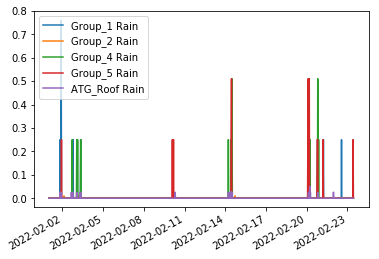

In [79]:
precip_obs = merge_davis_obs(dfs, column="Rain", quantity='Rain')
precip_obs = precip_obs[precip_obs.index >= pd.to_datetime('2022-02-01')]
precip_obs.iloc[:, [0,1,3,4,5]].plot()

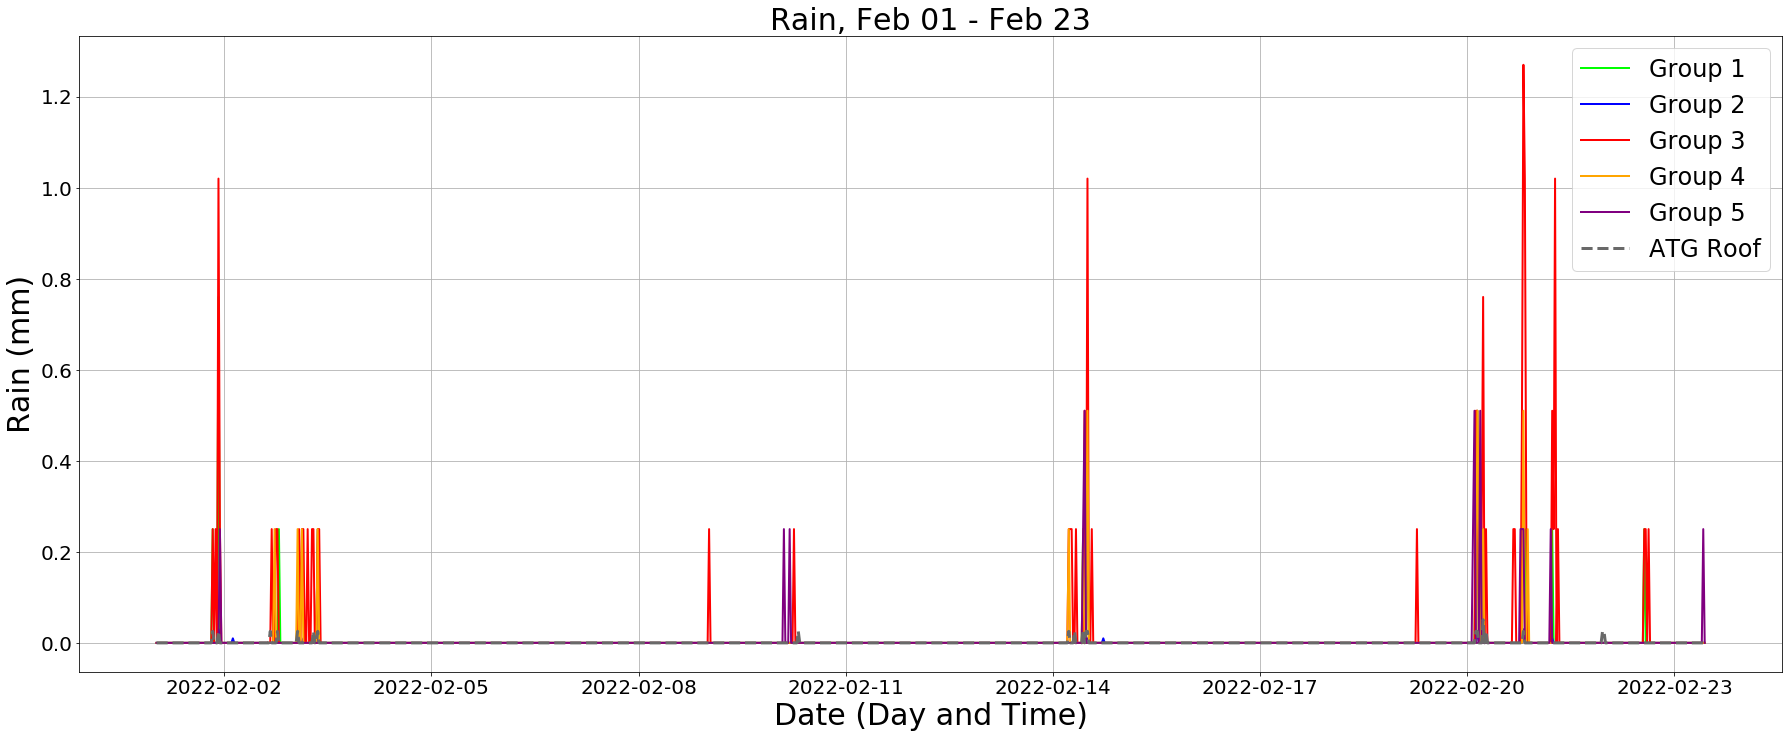

In [80]:
fig = plt.subplots(figsize=(25, 10))

plt.plot(precip_obs.index, precip_obs['Group_1 Rain'], 'lime', label = 'Group 1',  linewidth=2)
plt.plot(precip_obs.index, precip_obs['Group_2 Rain'], 'blue', label = 'Group 2',  linewidth=2)
plt.plot(precip_obs.index, precip_obs['Group_3 Rain'], 'red', label = 'Group 3',  linewidth=2)
plt.plot(precip_obs.index, precip_obs['Group_4 Rain'], 'orange', label = 'Group 4',  linewidth=2)
plt.plot(precip_obs.index, precip_obs['Group_5 Rain'], 'purple', label = 'Group 5',  linewidth=2)
plt.plot(precip_obs.index, precip_obs['ATG_Roof Rain'], 'dimgray', label = 'ATG Roof',  linestyle = 'dashed', linewidth=3)


plt.grid()
plt.legend(loc='best', fontsize='24')
plt.xlabel('Date (Day and Time)', fontsize='30')
plt.ylabel('Rain (mm)', fontsize='30')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')


# locs,_ = plt.xticks()
#plt.xticks(range(1,len(locs),500),rotation=90)

plt.tight_layout()
plt.title('Rain, Feb 01 - Feb 23', fontsize='30')
plt.savefig('Precip_ts.png')
plt.show()

In [81]:
precip_obs.corr()

,Group_1 Rain,Group_2 Rain,Group_3 Rain,Group_4 Rain,Group_5 Rain,ATG_Roof Rain
Group_1 Rain,1.000000,0.703221,0.633239,0.446693,0.110900,0.532797
Group_2 Rain,0.703221,1.000000,0.629121,0.601485,0.203324,0.460129
Group_3 Rain,0.633239,0.629121,1.000000,0.477633,0.193065,0.470265
Group_4 Rain,0.446693,0.601485,0.477633,1.000000,0.126071,0.506841
Group_5 Rain,0.110900,0.203324,0.193065,0.126071,1.000000,0.075605
ATG_Roof Rain,0.532797,0.460129,0.470265,0.506841,0.075605,1.000000


In [103]:
get_min_max_corr(precip_obs)

min: 0.07560545697188602
max: 0.7032214123902379


In [82]:
r_slope, r_slope_err, r_offset, r_offset_err = get_reg_matrix(precip_obs)

In [83]:
r_slope

,Group_1 Rain,Group_2 Rain,Group_3 Rain,Group_4 Rain,Group_5 Rain,ATG_Roof Rain
Group_1 Rain,1.000000,0.032238,1.505627,0.404945,0.100536,0.051758
Group_2 Rain,15.339571,1.000000,32.629106,11.894132,4.020645,0.975034
Group_3 Rain,0.266329,0.012130,1.000000,0.182109,0.073611,0.019214
Group_4 Rain,0.492745,0.030417,1.252727,1.000000,0.126071,0.054313
Group_5 Rain,0.122334,0.010282,0.506367,0.126071,1.000000,0.008102
ATG_Roof Rain,5.484571,0.217140,11.509935,4.729770,0.705539,1.000000


In [84]:
r_slope_err

,Group_1 Rain,Group_2 Rain,Group_3 Rain,Group_4 Rain,Group_5 Rain,ATG_Roof Rain
Group_1 Rain,0.000000,0.000981,0.055384,0.024410,0.027115,0.002474
Group_2 Rain,0.466754,0.000000,1.213329,0.475453,0.582714,0.056623
Group_3 Rain,0.009797,0.000451,0.000000,0.010082,0.011259,0.001085
Group_4 Rain,0.029703,0.001216,0.069350,0.000000,0.029856,0.002780
Group_5 Rain,0.032995,0.001490,0.077451,0.029856,0.000000,0.003216
ATG_Roof Rain,0.262175,0.012610,0.650089,0.242109,0.280052,0.000000


In [85]:
r_offset

,Group_1 Rain,Group_2 Rain,Group_3 Rain,Group_4 Rain,Group_5 Rain,ATG_Roof Rain
Group_1 Rain,0.000000,0.000060,0.009248,0.001897,0.003210,0.000307
Group_2 Rain,0.001262,0.000000,0.009251,0.001278,0.002844,0.000337
Group_3 Rain,0.000120,0.000008,0.000000,0.000777,0.002485,0.000228
Group_4 Rain,0.002517,0.000088,0.011177,0.000000,0.003184,0.000333
Group_5 Rain,0.003867,0.000161,0.013896,0.003184,0.000000,0.000501
ATG_Roof Rain,0.001402,0.000084,0.009632,0.001133,0.003269,0.000000


In [86]:
r_offset_err

,Group_1 Rain,Group_2 Rain,Group_3 Rain,Group_4 Rain,Group_5 Rain,ATG_Roof Rain
Group_1 Rain,0.000000,0.000039,0.002179,0.000961,0.001067,0.000097
Group_2 Rain,0.000842,0.000000,0.002189,0.000858,0.001051,0.000102
Group_3 Rain,0.000924,0.000043,0.000000,0.000951,0.001062,0.000102
Group_4 Rain,0.001059,0.000043,0.002472,0.000000,0.001064,0.000099
Group_5 Rain,0.001176,0.000053,0.002761,0.001064,0.000000,0.000115
ATG_Roof Rain,0.001006,0.000048,0.002494,0.000929,0.001074,0.000000


In [87]:
precip_reg = get_reg_table(precip_obs)
precip_reg

Gain Bias Gain Bias Error  \
Dependent Variable Independent Variable                              
ATG Roof           ATG Roof                  1.000         < 0.001   
                   Group 1                   0.052           0.002   
                   Group 2                   0.975           0.057   
                   Group 3                   0.019           0.001   
                   Group 4                   0.054           0.003   
                   Group 5                   0.008           0.003   
Group 1            ATG Roof                  5.485           0.262   
                   Group 1                   1.000         < 0.001   
                   Group 2                  15.340           0.467   
                   Group 3                   0.266            0.01   
                   Group 4                   0.493            0.03   
                   Group 5                   0.122           0.033   
Group 2            ATG Roof                  0.217           0.013   
                   Group 1                   0.032           0.001   
                   Group 2                   1.000         < 0.001   
                   Group 3                   0.012         < 0.001   
                   Group 4                   0.030           0.001   
                   Group 5                   0.010           0.001   
Group 3            ATG Roof                 11.510            0.65   
                   Group 1                   1.506           0.055   
                   Group 2                  32.629           1.213   
                   Group 3                   1.000         < 0.001   
                   Group 4                   1.253           0.069   
                   Group 5                   0.506           0.077   
Group 4            ATG Roof                  4.730           0.242   
                   Group 1                   0.405           0.024   
                   Group 2                  11.894           0.475   
                   Group 3                   0.182            0.01   
                   Group 4                   1.000         < 0.001   
                   Group 5                   0.126            0.03   
Group 5            ATG Roof                  0.706            0.28   
                   Group 1                   0.101           0.027   
                   Group 2                   4.021           0.583   
                   Group 3                   0.074           0.011   
                   Group 4                   0.126            0.03   
                   Group 5                   1.000         < 0.001   

                                        Offset Bias Offset Bias Error  
Dependent Variable Independent Variable                                
ATG Roof           ATG Roof                 < 0.001           < 0.001  
                   Group 1                  < 0.001           < 0.001  
                   Group 2                  < 0.001           < 0.001  
                   Group 3                  < 0.001           < 0.001  
                   Group 4                  < 0.001           < 0.001  
                   Group 5                  < 0.001           < 0.001  
Group 1            ATG Roof                 < 0.001             0.001  
                   Group 1                  < 0.001           < 0.001  
                   Group 2                  < 0.001             0.001  
                   Group 3                  < 0.001             0.001  
                   Group 4                  < 0.001             0.001  
                   Group 5                  < 0.001             0.001  
Group 2            ATG Roof                 < 0.001           < 0.001  
                   Group 1                  < 0.001           < 0.001  
                   Group 2                  < 0.001           < 0.001  
                   Group 3                  < 0.001           < 0.001  
                   Group 4                  < 0.001           < 0.001  
            

# Humidity

In [88]:
hum_obs = merge_davis_obs(dfs, column='Out Hum', quantity='RH')
plt.figure(figsize=(12, 8))
hum_obs = hum_obs[hum_obs.index >= pd.to_datetime('2022-02-01')]

<Figure size 864x576 with 0 Axes>

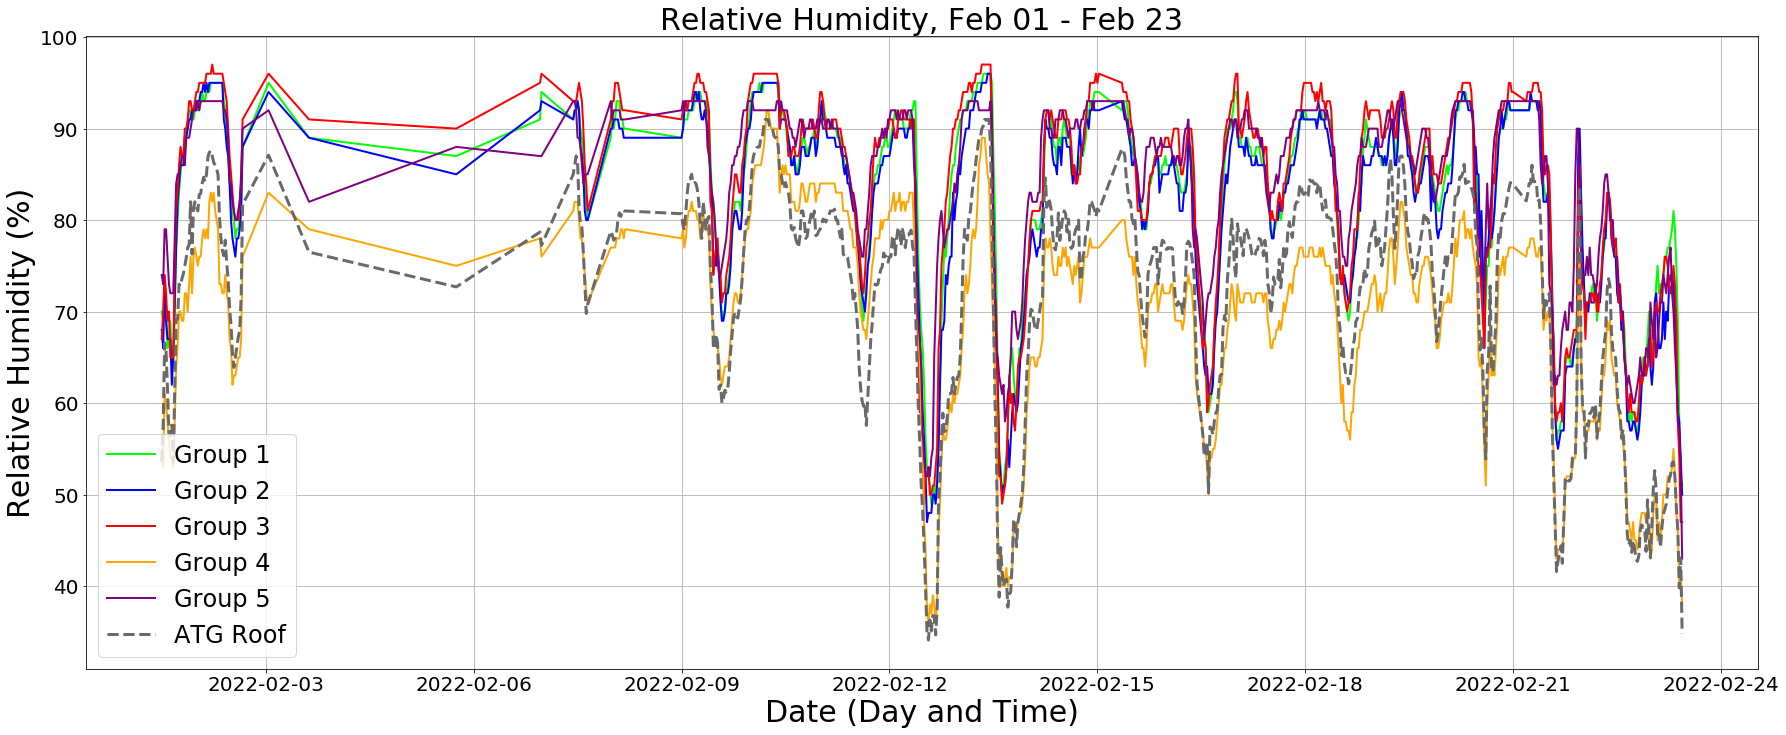

In [89]:
fig = plt.subplots(figsize=(25, 10))

plt.plot(hum_obs.index, hum_obs['Group_1 RH'], 'lime', label = 'Group 1',  linewidth=2)
plt.plot(hum_obs.index, hum_obs['Group_2 RH'], 'blue', label = 'Group 2',  linewidth=2)
plt.plot(hum_obs.index, hum_obs['Group_3 RH'], 'red', label = 'Group 3',  linewidth=2)
plt.plot(hum_obs.index, hum_obs['Group_4 RH'], 'orange', label = 'Group 4',  linewidth=2)
plt.plot(hum_obs.index, hum_obs['Group_5 RH'], 'purple', label = 'Group 5',  linewidth=2)
plt.plot(hum_obs.index, hum_obs['ATG_Roof RH'], 'dimgray', label = 'ATG Roof',  linestyle = 'dashed', linewidth=3)


plt.grid()
plt.legend(loc='best', fontsize='24')
plt.xlabel('Date (Day and Time)', fontsize='30')
plt.ylabel('Relative Humidity (%)', fontsize='30')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')


# locs,_ = plt.xticks()
#plt.xticks(range(1,len(locs),500),rotation=90)

plt.tight_layout()
plt.title('Relative Humidity, Feb 01 - Feb 23', fontsize='30')
plt.savefig('RH_ts.png')
plt.show()

In [90]:
hum_obs.corr()

,Group_1 RH,Group_2 RH,Group_3 RH,Group_4 RH,Group_5 RH,ATG_Roof RH
Group_1 RH,1.000000,0.984255,0.978931,0.916967,0.925766,0.944988
Group_2 RH,0.984255,1.000000,0.975423,0.934086,0.943466,0.968445
Group_3 RH,0.978931,0.975423,1.000000,0.903269,0.949158,0.942353
Group_4 RH,0.916967,0.934086,0.903269,1.000000,0.894277,0.957259
Group_5 RH,0.925766,0.943466,0.949158,0.894277,1.000000,0.936286
ATG_Roof RH,0.944988,0.968445,0.942353,0.957259,0.936286,1.000000
